* Load models from model_joblibs folder
* Make table comparing performance metrics of each model
    * Confusion Matrix
    * Accuracy
    * Classification Report: F1 score

In [35]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from helpers import (get_training_observations, 
                     get_training_labels, 
                     get_protein_proportions)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# sklearn package functions
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# EMPO_3 Decision Tree

## Load Model

In [4]:
from joblib import load
model = load('../model_joblibs/decision_tree.joblib')
print(model)
x_train = get_training_observations()
y_train = get_training_labels()
# Split into train/validation if not CV
X_tr, X_val, Y_tr, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
model.fit(X_tr, Y_tr['EMPO_3'])
y_pred = model.predict(X_val)

DecisionTreeClassifier(criterion='entropy', max_depth=10)


## Confusion Matrix

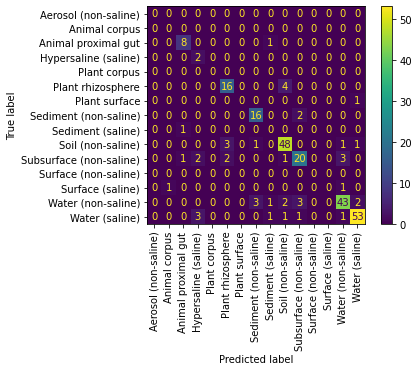

In [36]:
cm = confusion_matrix(Y_val['EMPO_3'], y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

# Accuracy

In [38]:
print(f"Accuracy of EMPO_3 Decision Tree Model is ", accuracy_score(Y_val['EMPO_3'], y_pred))

Accuracy of EMPO_3 Decision Tree Model is  0.824


# Classification Report

In a nutshell, the major difference between ROC AUC and F1 is related to class imbalance. Here is a summary of reading many StackOverflow threads on how to choose one over the other:

**If you have a high class imbalance, always choose the F1 score because a high F1 score considers both precision and recall.** To get a high F1, both false positives and false negatives must be low. On the other hand, ROC AUC can give precious high scores with a high enough number of false positives. Besides, you can also think of the ROC AUC score as the average of F1 scores (both good and bad) evaluated at various thresholds. Always use F1 when you have a class imbalance. Higher ROC AUC does not necessarily mean a better classifier.

[Source: Comprehensive Guide to Multiclass Classification Metrics](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_val['EMPO_3'], y_pred, zero_division=0))
# zero_divison hides UndefinedMetricWarning: zero scores are due to labels not appearing in y_pred
# In these instances, refer to the 'weighted avg'

                         precision    recall  f1-score   support

          Animal corpus       0.00      0.00      0.00         0
    Animal proximal gut       0.80      0.89      0.84         9
   Hypersaline (saline)       0.29      1.00      0.44         2
      Plant rhizosphere       0.76      0.80      0.78        20
          Plant surface       0.00      0.00      0.00         1
  Sediment (non-saline)       0.80      0.89      0.84        18
      Sediment (saline)       0.00      0.00      0.00         1
      Soil (non-saline)       0.86      0.89      0.87        54
Subsurface (non-saline)       0.77      0.69      0.73        29
       Surface (saline)       0.00      0.00      0.00         2
     Water (non-saline)       0.88      0.80      0.83        54
         Water (saline)       0.93      0.88      0.91        60

               accuracy                           0.82       250
              macro avg       0.51      0.57      0.52       250
           weighted avg